In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
import yfinance as yf
import pandas as pd

# Download 10 stock data
START_DATE = "2023-08-30"
END_DATE = "2025-08-30"

stocks = [
    'HDFCBANK.NS',  # HDFC Bank Ltd.
    'ITC.NS',       # ITC Ltd.      
    'TCS.NS',       # Tata Consultancy Services
    'RELIANCE.NS',  # Reliance Industries Ltd.
    'COALINDIA.NS', # Coal India Ltd.
    'INFY.NS',      # Infosys Ltd.
    'BAJFINANCE.NS',# Bajaj Finance Ltd.
    'ASIANPAINT.NS',# Asian Paints Ltd.
    'LT.NS',        # Larsen & Toubro Ltd.
    'BEL.NS'        # Bharat Electronics Ltd.
]


raw_data = yf.download(stocks, start = START_DATE, end = END_DATE)

data = raw_data['Close']

[*********************100%***********************]  10 of 10 completed


In [33]:
data.head()

Ticker,ASIANPAINT.NS,BAJFINANCE.NS,BEL.NS,COALINDIA.NS,HDFCBANK.NS,INFY.NS,ITC.NS,LT.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,,,
2023-08-30,3222.139160,719.722351,132.162628,197.842957,761.769226,1362.069092,414.485626,2663.034668,1200.142212,3285.771240
2023-08-31,3184.389404,709.314819,130.836563,198.967331,758.270874,1362.353638,411.583862,2656.841553,1194.657715,3252.681152
2023-09-01,3187.763672,724.921143,135.404068,204.891785,759.839111,1370.326050,412.847534,2656.251953,1197.461914,3274.385986
2023-09-04,3164.291992,719.935303,138.056152,214.319077,764.592041,1390.494019,409.524536,2665.099121,1196.494141,3312.467285
2023-09-05,3152.311768,727.347290,137.221222,220.848953,759.935669,1403.591309,414.766449,2686.578125,1202.896851,3322.980469


In [34]:
data.count()

Ticker
ASIANPAINT.NS    494
BAJFINANCE.NS    494
BEL.NS           494
COALINDIA.NS     494
HDFCBANK.NS      494
INFY.NS          494
ITC.NS           494
LT.NS            494
RELIANCE.NS      494
TCS.NS           494
dtype: int64

In [35]:
data.isnull().values.any()

False

In [36]:
estimation_data = data.iloc[:248] # using half of the data for estimating mu and sigma^2

estimation_data.head()

Ticker,ASIANPAINT.NS,BAJFINANCE.NS,BEL.NS,COALINDIA.NS,HDFCBANK.NS,INFY.NS,ITC.NS,LT.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,,,
2023-08-30,3222.139160,719.722351,132.162628,197.842957,761.769226,1362.069092,414.485626,2663.034668,1200.142212,3285.771240
2023-08-31,3184.389404,709.314819,130.836563,198.967331,758.270874,1362.353638,411.583862,2656.841553,1194.657715,3252.681152
2023-09-01,3187.763672,724.921143,135.404068,204.891785,759.839111,1370.326050,412.847534,2656.251953,1197.461914,3274.385986
2023-09-04,3164.291992,719.935303,138.056152,214.319077,764.592041,1390.494019,409.524536,2665.099121,1196.494141,3312.467285
2023-09-05,3152.311768,727.347290,137.221222,220.848953,759.935669,1403.591309,414.766449,2686.578125,1202.896851,3322.980469


In [37]:
estimation_data.shift(1).head()

Ticker,ASIANPAINT.NS,BAJFINANCE.NS,BEL.NS,COALINDIA.NS,HDFCBANK.NS,INFY.NS,ITC.NS,LT.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,,,
2023-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-31,3222.139160,719.722351,132.162628,197.842957,761.769226,1362.069092,414.485626,2663.034668,1200.142212,3285.771240
2023-09-01,3184.389404,709.314819,130.836563,198.967331,758.270874,1362.353638,411.583862,2656.841553,1194.657715,3252.681152
2023-09-04,3187.763672,724.921143,135.404068,204.891785,759.839111,1370.326050,412.847534,2656.251953,1197.461914,3274.385986
2023-09-05,3164.291992,719.935303,138.056152,214.319077,764.592041,1390.494019,409.524536,2665.099121,1196.494141,3312.467285


In [38]:
# Instead of: returns = estimation_data - estimation_data.shift(1)
returns = estimation_data.pct_change().dropna()


In [39]:
returns.head()

Ticker,ASIANPAINT.NS,BAJFINANCE.NS,BEL.NS,COALINDIA.NS,HDFCBANK.NS,INFY.NS,ITC.NS,LT.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,,,
2023-08-31,-0.011716,-0.014460,-0.010034,0.005683,-0.004592,0.000209,-0.007001,-0.002326,-0.004570,-0.010071
2023-09-01,0.001060,0.022002,0.034910,0.029776,0.002068,0.005852,0.003070,-0.000222,0.002347,0.006673
2023-09-04,-0.007363,-0.006878,0.019586,0.046011,0.006255,0.014718,-0.008049,0.003331,-0.000808,0.011630
2023-09-05,-0.003786,0.010295,-0.006048,0.030468,-0.006090,0.009419,0.012800,0.008059,0.005351,0.003174
2023-09-06,0.000621,0.005813,-0.010021,0.001762,0.013080,-0.000981,0.009817,-0.000915,0.002104,0.000160


In [40]:
returns = returns.dropna()

returns.head()

Ticker,ASIANPAINT.NS,BAJFINANCE.NS,BEL.NS,COALINDIA.NS,HDFCBANK.NS,INFY.NS,ITC.NS,LT.NS,RELIANCE.NS,TCS.NS
Date,,,,,,,,,,
2023-08-31,-0.011716,-0.014460,-0.010034,0.005683,-0.004592,0.000209,-0.007001,-0.002326,-0.004570,-0.010071
2023-09-01,0.001060,0.022002,0.034910,0.029776,0.002068,0.005852,0.003070,-0.000222,0.002347,0.006673
2023-09-04,-0.007363,-0.006878,0.019586,0.046011,0.006255,0.014718,-0.008049,0.003331,-0.000808,0.011630
2023-09-05,-0.003786,0.010295,-0.006048,0.030468,-0.006090,0.009419,0.012800,0.008059,0.005351,0.003174
2023-09-06,0.000621,0.005813,-0.010021,0.001762,0.013080,-0.000981,0.009817,-0.000915,0.002104,0.000160


In [41]:
import numpy as np

mu = [] # expected returns

for stock in stocks:
    mean = np.mean(returns[stock])
    mu.append(mean)

In [42]:
mu = np.array(mu)

In [43]:
mu

array([3.06260349e-04, 7.39714702e-04, 1.26933106e-03, 1.01420239e-03,
       3.72004857e-03, 1.38846650e-03, 1.62179643e-04, 3.51028401e-05,
       1.38589586e-03, 3.58423808e-03])

In [44]:
mu.shape

(10,)

In [45]:
V = np.cov(returns, rowvar=False) # covariance matrix

In [46]:
V

array([[1.34677063e-04, 5.49555379e-05, 4.71831021e-05, 4.89812599e-05,
        4.42407401e-05, 2.16763573e-05, 3.74868500e-05, 4.51818846e-05,
        3.87481900e-05, 3.08065775e-05],
       [5.49555379e-05, 2.48451574e-04, 1.23004266e-04, 9.72896666e-05,
        6.79706651e-05, 4.75361441e-05, 5.49970657e-05, 1.07424310e-04,
        8.38977785e-05, 3.52160114e-05],
       [4.71831021e-05, 1.23004266e-04, 5.93140757e-04, 3.32244147e-04,
        9.84137478e-05, 4.51701374e-05, 4.68475509e-05, 2.38603298e-04,
        1.52804018e-04, 1.55467267e-05],
       [4.89812599e-05, 9.72896666e-05, 3.32244147e-04, 4.98360590e-04,
        7.17254963e-05, 4.03161831e-05, 5.27975023e-05, 1.82506763e-04,
        1.43555315e-04, 2.88698675e-05],
       [4.42407401e-05, 6.79706651e-05, 9.84137478e-05, 7.17254963e-05,
        1.83791129e-04, 3.14324673e-05, 2.13100182e-05, 7.54484902e-05,
        5.76170335e-05, 1.44306014e-05],
       [2.16763573e-05, 4.75361441e-05, 4.51701374e-05, 4.03161831e-05,
   

In [47]:
V.shape

(10, 10)

In [48]:
inv_V = np.linalg.inv(V)

In [49]:
inv_V

array([[ 9.21836240e+03, -9.82595108e+02,  8.51149765e+01,
        -2.01437221e+02, -1.49107461e+03,  1.02346502e+03,
        -1.69628423e+03, -1.66127752e+02, -3.32680570e+02,
        -1.74916971e+03],
       [-9.82595108e+02,  5.67666212e+03, -1.92626321e+02,
         7.60965054e+01, -8.16019371e+02, -5.84937921e+02,
        -1.19714358e+03, -9.56559526e+02, -1.14821196e+03,
         2.30420632e+02],
       [ 8.51149765e+01, -1.92626321e+02,  3.40151047e+03,
        -1.43693629e+03, -3.50642726e+02, -4.58832157e+02,
         4.90470757e+01, -1.60141546e+03, -6.60120530e+02,
         9.92168283e+02],
       [-2.01437221e+02,  7.60965054e+01, -1.43693629e+03,
         3.54865833e+03,  4.62683998e+01,  3.42276833e+01,
        -3.86854314e+02, -5.41142945e+02, -1.21393582e+03,
         4.19222449e+00],
       [-1.49107461e+03, -8.16019371e+02, -3.50642726e+02,
         4.62683998e+01,  6.89449319e+03, -1.07051711e+03,
         2.77196380e+02, -6.62597867e+02, -9.04574936e+02,
         1.

In [50]:
inv_V.shape

(10, 10)

In [51]:
ones = np.ones(10)

In [52]:
ones.shape

(10,)

In [53]:
# Estimating optimal mean and variance

A = mu.T @ inv_V @ mu
B = mu.T @ inv_V @ ones
C = ones.T @ inv_V @ones

In [54]:
print(f"A: {A}\nB: {B}\nC: {C}")

A: 0.2095244014615516
B: 28.327284122888074
C: 17498.501072814026


In [55]:
D = A*C - B**2
print(f"D: {D}")

D: 2863.9279379768504


In [56]:
# Plot Mean-Variance and Mean-Std.Dev Frontier (Parabolic, Hyperbolic)

import matplotlib.pyplot as plt

y = np.linspace(-3.5, 7.5, 400) # (B/C) is the return corresponding to minimum variance w_mvp

x_var = (C/D) * (y - B/C)**2 + (1/C)
x_std = np.sqrt(x_var)

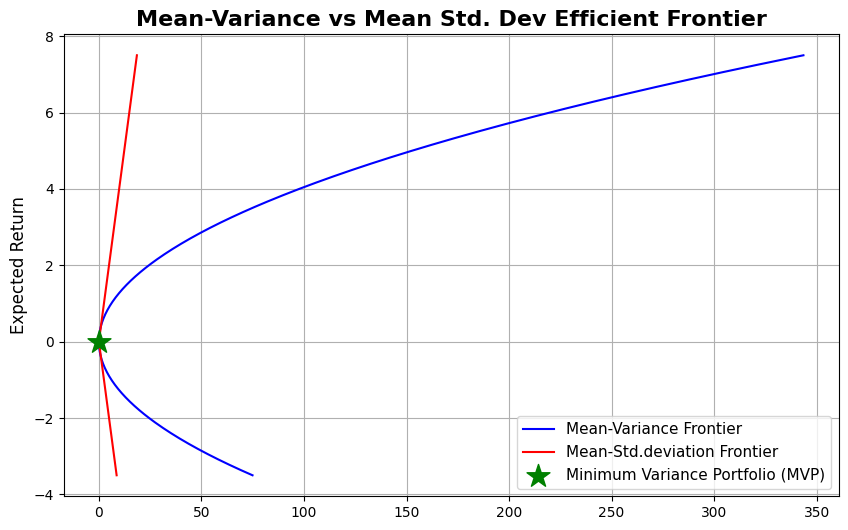

In [57]:
plt.figure(figsize=(10, 6))

plt.plot(x_var, y, 'b-', label='Mean-Variance Frontier')
plt.plot(x_std, y, 'r-', label='Mean-Std.deviation Frontier')

# Mark the Minimum Variance Portfolio
plt.scatter((1/C), (B/C), marker='*', color='green', s=300, zorder=100, label='Minimum Variance Portfolio (MVP)')

# Add labels and title
plt.title('Mean-Variance vs Mean Std. Dev Efficient Frontier', fontsize=16, fontweight='bold')
plt.ylabel('Expected Return', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True)
plt.show()

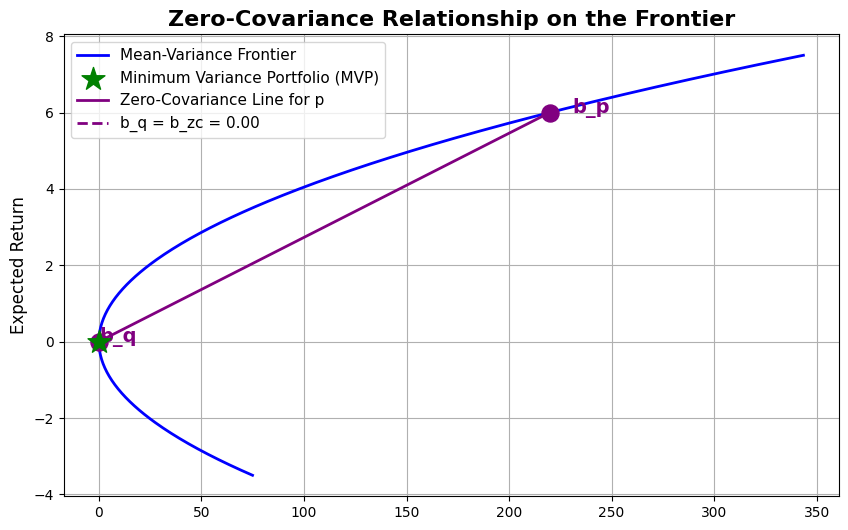

In [58]:
# Plot zero covariance Relationship on Mean - Variance frontier
b_p = 6
var_p = (C / D) * (b_p - B / C)**2 + (1 / C)

y_zc = (B / C) - D / (C**2 * (b_p - B / C))
var_zc = (C / D) * (y_zc - B / C)**2 + (1 / C)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x_var, y, 'b-', linewidth=2, label='Mean-Variance Frontier')
ax.scatter((1/C), (B/C), marker='*', color='green', s=300, zorder=100, label='Minimum Variance Portfolio (MVP)')

ax.scatter([var_p, var_zc], [b_p, y_zc], marker='o', color='purple', s=150, zorder=5)
ax.text(var_p * 1.05, b_p, 'b_p', fontsize=14, fontweight='bold', color='purple')
ax.text(var_zc * 1.05, y_zc, 'b_q', fontsize=14, fontweight='bold', color='purple')

ax.plot([var_p, var_zc], [b_p, y_zc], color='purple', linestyle='-', linewidth=2, label='Zero-Covariance Line for p')

ax.axhline(y=y_zc, xmin=0, xmax=var_zc / plt.xlim()[1] - 0.15, color='purple', linestyle='--', linewidth = 2, label=f'b_q = b_zc = {y_zc:.2f}')

ax.set_title('Zero-Covariance Relationship on the Frontier', fontsize=16, fontweight='bold')
ax.legend(fontsize=11)
plt.ylabel('Expected Return', fontsize=12)
ax.grid(True)

plt.show()

In [59]:
import numpy as np

# you already have mu (expected returns) and V (covariance matrix) from your assignment

# 1. Compute inverse covariance matrix
inv_V = np.linalg.inv(V)

# 2. Compute Minimum Variance Portfolio (MVP) weights
ones = np.ones(len(mu))
w_mvp = inv_V @ ones / (ones.T @ inv_V @ ones)

print("MVP Weights:")
for stock, w in zip(stocks, w_mvp):
    print(f"{stock}: {w:.4f}")

# 3. Scale to ₹100,000 investment
investment = 100000
allocations = investment * w_mvp

print("\nRupee Investment Allocation (₹100000 total):")
for stock, amt in zip(stocks, allocations):
    print(f"{stock}: ₹{amt:.2f}")

# 4. Expected portfolio return (daily, from mu)
mu_portfolio = w_mvp.T @ mu
# Expected portfolio variance
var_portfolio = w_mvp.T @ V @ w_mvp

print(f"\nExpected Daily Portfolio Return: {mu_portfolio:.4f}")
print(f"Expected Daily Portfolio Variance: {var_portfolio:.4f}")
print(f"Expected Daily Portfolio Std Dev: {np.sqrt(var_portfolio):.4f}")

# 5. Annualize (assuming 252 trading days)
annual_return = (1 + mu_portfolio) ** 252 - 1
annual_volatility = np.sqrt(var_portfolio) * np.sqrt(252)

print(f"\nExpected Annual Return: {annual_return*100:.2f}%")
print(f"Expected Annual Volatility: {annual_volatility*100:.2f}%")

# 6. Final value after 1 year (approx expectation)
final_value = investment * (1 + annual_return)
print(f"\nExpected Final Value after 1 year: ₹{final_value:.2f}")


MVP Weights:
HDFCBANK.NS: 0.2119
ITC.NS: 0.0060
TCS.NS: -0.0099
RELIANCE.NS: -0.0040
COALINDIA.NS: 0.1706
INFY.NS: 0.0654
BAJFINANCE.NS: 0.2614
ASIANPAINT.NS: 0.0000
LT.NS: 0.1237
BEL.NS: 0.1749

Rupee Investment Allocation (₹100000 total):
HDFCBANK.NS: ₹21187.95
ITC.NS: ₹600.54
TCS.NS: ₹-987.13
RELIANCE.NS: ₹-404.97
COALINDIA.NS: ₹17056.70
INFY.NS: ₹6539.61
BAJFINANCE.NS: ₹26142.68
ASIANPAINT.NS: ₹4.09
LT.NS: ₹12365.89
BEL.NS: ₹17494.64

Expected Daily Portfolio Return: 0.0016
Expected Daily Portfolio Variance: 0.0001
Expected Daily Portfolio Std Dev: 0.0076

Expected Annual Return: 50.32%
Expected Annual Volatility: 12.00%

Expected Final Value after 1 year: ₹150323.28


In [61]:

returns_est = estimation_data.pct_change().dropna()
mu = returns_est.mean().values         # daily mean
V  = returns_est.cov().values          # daily covariance

ones = np.ones(len(mu))
inv_V = np.linalg.inv(V)
w_mvp = (inv_V @ ones) / (ones.T @ inv_V @ ones)

test_prices = data.iloc[248:].copy()
test_returns = test_prices.pct_change().dropna()
w_series = pd.Series(w_mvp, index=test_returns.columns)

# 3) Portfolio daily returns and value path (₹100,000)
investment = 100_000
port_ret = (test_returns @ w_series)
port_curve = (1 + port_ret).cumprod()
port_value = investment * port_curve

# 4) Benchmark: NIFTY 50 over exact same dates
start_dt = test_returns.index[0]
end_dt   = test_returns.index[-1]
nifty = yf.download("^NSEI", start=start_dt, end=end_dt)["Close"].dropna()
nifty_ret = nifty.pct_change().dropna()
# Re-align to the same dates as portfolio for a fair comparison
common_idx = test_returns.index.intersection(nifty_ret.index)
port_ret2   = port_ret.reindex(common_idx).dropna()
nifty_ret2  = nifty_ret.reindex(common_idx).dropna()

port_curve2  = (1 + port_ret2).cumprod()
nifty_curve2 = (1 + nifty_ret2).cumprod()

port_value2  = investment * port_curve2
nifty_value2 = investment * nifty_curve2

# 5) Metrics
days = len(common_idx)
ann_factor = 252
def ann_return(daily_ret):
    return (1 + daily_ret.mean())**ann_factor - 1
def ann_vol(daily_ret):
    return daily_ret.std() * np.sqrt(ann_factor)
def sharpe(daily_ret, rf=0.0):
    return (daily_ret.mean() - rf/ann_factor) / daily_ret.std() * np.sqrt(ann_factor)

def max_drawdown(series):
    roll_max = series.cummax()
    dd = series / roll_max - 1.0
    return dd.min()

metrics = {
    "Total Return (%)": [
        (port_curve2.iloc[-1]-1)*100,
        (nifty_curve2.iloc[-1]-1)*100
    ],
    "Annualized Return (%)": [
        ann_return(port_ret2)*100,
        ann_return(nifty_ret2)*100
    ],
    "Annualized Volatility (%)": [
        ann_vol(port_ret2)*100,
        ann_vol(nifty_ret2)*100
    ],
    "Sharpe (rf≈0)": [
        sharpe(port_ret2),
        sharpe(nifty_ret2)
    ],
    "Max Drawdown (%)": [
        max_drawdown(port_curve2)*100,
        max_drawdown(nifty_curve2)*100
    ],
    "Final Value (₹)": [
        port_value2.iloc[-1],
        nifty_value2.iloc[-1]
    ]
}
summary = pd.DataFrame(metrics, index=["Your MVP", "NIFTY 50"])
alloc_table = pd.DataFrame({
    "Weight": w_series,
    "₹ Allocation (100000)": (w_series * investment).round(2)
})

print("=== Allocation (MVP) ===")
print(alloc_table.round(4))
print("\n=== Performance (Out-of-Sample, second half) ===")
print(summary.round(4))


[*********************100%***********************]  1 of 1 completed

=== Allocation (MVP) ===
               Weight  ₹ Allocation (100000)
Ticker                                      
ASIANPAINT.NS  0.2119               21187.95
BAJFINANCE.NS  0.0060                 600.54
BEL.NS        -0.0099                -987.13
COALINDIA.NS  -0.0040                -404.97
HDFCBANK.NS    0.1706               17056.70
INFY.NS        0.0654                6539.61
ITC.NS         0.2614               26142.68
LT.NS          0.0000                   4.09
RELIANCE.NS    0.1237               12365.89
TCS.NS         0.1749               17494.64

=== Performance (Out-of-Sample, second half) ===
                                           Total Return (%)  \
Your MVP                                         -13.553847   
NIFTY 50  Ticker
^NSEI   -1.413359
Name: 2025-08-28 00:0...   

                            Annualized Return (%)  \
Your MVP                               -13.334701   
NIFTY 50  Ticker
^NSEI   -0.599473
dtype: float64   

                         Annualized

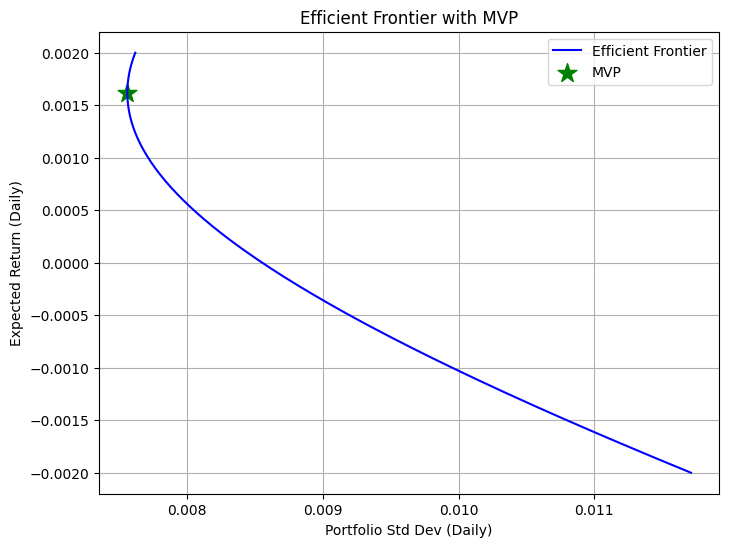

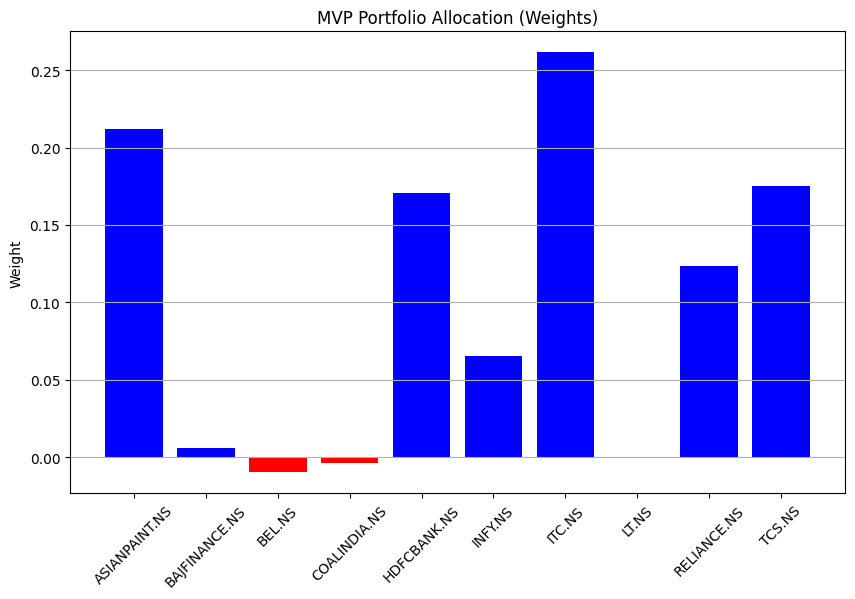

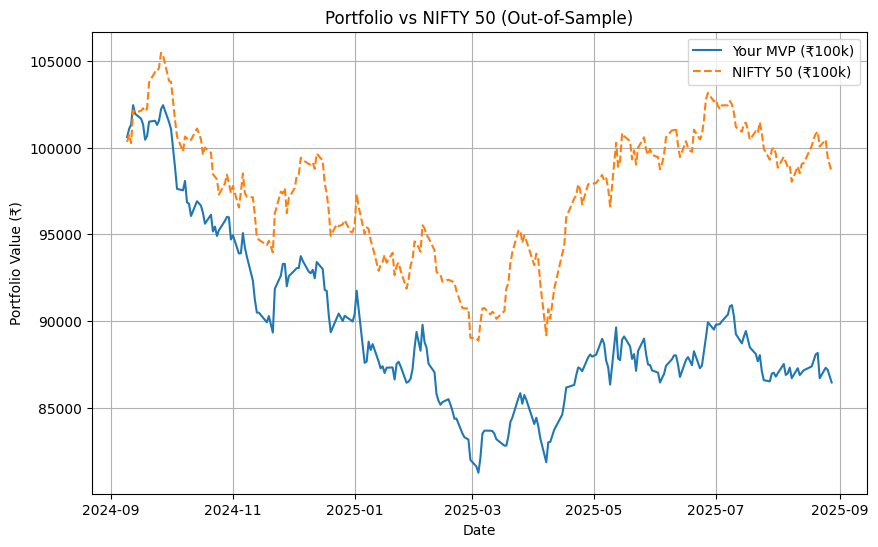

In [62]:
import matplotlib.pyplot as plt

# === 1. Efficient Frontier with MVP ===
# Using your already computed A, B, C, D
y = np.linspace(-0.002, 0.002, 200)   # range of daily expected returns
x_var = (C/D) * (y - B/C)**2 + (1/C)  # variance frontier
x_std = np.sqrt(x_var)                # std-dev frontier

plt.figure(figsize=(8,6))
plt.plot(x_std, y, 'b-', label='Efficient Frontier')
plt.scatter(np.sqrt(1/C), B/C, marker='*', color='green', s=200, label='MVP')
plt.xlabel('Portfolio Std Dev (Daily)')
plt.ylabel('Expected Return (Daily)')
plt.title('Efficient Frontier with MVP')
plt.legend()
plt.grid(True)
plt.show()

# === 2. Portfolio Allocation Bar Chart ===
plt.figure(figsize=(10,6))
colors = ['red' if w<0 else 'blue' for w in w_series]  # red for shorts
plt.bar(w_series.index, w_series.values, color=colors)
plt.xticks(rotation=45)
plt.ylabel("Weight")
plt.title("MVP Portfolio Allocation (Weights)")
plt.grid(axis='y')
plt.show()

# === 3. Cumulative Value Curve: MVP vs NIFTY 50 ===
plt.figure(figsize=(10,6))
plt.plot(port_value2.index, port_value2, label='Your MVP (₹100k)')
plt.plot(nifty_value2.index, nifty_value2, label='NIFTY 50 (₹100k)', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Portfolio Value (₹)")
plt.title("Portfolio vs NIFTY 50 (Out-of-Sample)")
plt.legend()
plt.grid(True)
plt.show()
